# **Web Scraping & Data Handling Challenge**



### **Website:**
JustWatch -  https://www.justwatch.com/in/movies?release_year_from=2000


### **Description:**

JustWatch is a popular platform that allows users to search for movies and TV shows across multiple streaming services like Netflix, Amazon Prime, Hulu, etc. For this assignment, you will be required to scrape movie and TV show data from JustWatch using Selenium, Python, and BeautifulSoup. Extract data from HTML, not by directly calling their APIs. Then, perform data filtering and analysis using Pandas, and finally, save the results to a CSV file.

### **Tasks:**

**1. Web Scraping:**

Use BeautifulSoup to scrape the following data from JustWatch:

   **a. Movie Information:**

      - Movie title
      - Release year
      - Genre
      - IMDb rating
      - Streaming services available (Netflix, Amazon Prime, Hulu, etc.)
      - URL to the movie page on JustWatch

   **b. TV Show Information:**

      - TV show title
      - Release year
      - Genre
      - IMDb rating
      - Streaming services available (Netflix, Amazon Prime, Hulu, etc.)
      - URL to the TV show page on JustWatch

  **c. Scope:**

```
 ` - Scrape data for at least 50 movies and 50 TV shows.
   - You can choose the entry point (e.g., starting with popular movies,
     or a specific genre, etc.) to ensure a diverse dataset.`

```


**2. Data Filtering & Analysis:**

   After scraping the data, use Pandas to perform the following tasks:

   **a. Filter movies and TV shows based on specific criteria:**

   ```
      - Only include movies and TV shows released in the last 2 years (from the current date).
      - Only include movies and TV shows with an IMDb rating of 7 or higher.
```

   **b. Data Analysis:**

   ```
      - Calculate the average IMDb rating for the scraped movies and TV shows.
      - Identify the top 5 genres that have the highest number of available movies and TV shows.
      - Determine the streaming service with the most significant number of offerings.
      
   ```   

**3. Data Export:**

```
   - Dump the filtered and analysed data into a CSV file for further processing and reporting.

   - Keep the CSV file in your Drive Folder and Share the Drive link on the colab while keeping view access with anyone.
```

**Submission:**
```
- Submit a link to your Colab made for the assignment.

- The Colab should contain your Python script (.py format only) with clear
  comments explaining the scraping, filtering, and analysis process.

- Your Code shouldn't have any errors and should be executable at a one go.

- Before Conclusion, Keep your Dataset Drive Link in the Notebook.
```



**Note:**

1. Properly handle errors and exceptions during web scraping to ensure a robust script.

2. Make sure your code is well-structured, easy to understand, and follows Python best practices.

3. The assignment will be evaluated based on the correctness of the scraped data, accuracy of data filtering and analysis, and the overall quality of the Python code.








# **Start The Project**

## **Task 1:- Web Scrapping**

In [ ]:
#Installing all necessary labraries
!pip install bs4
!pip install requests

In [ ]:
#import all necessary labraries
import requests
from bs4 import BeautifulSoup
import re
import pandas as pd
import numpy as np
import time

## **Scrapping Movies Data**

In [ ]:
# Specifying the URL from which movies related data will be fetched
url='https://www.justwatch.com/in/movies?release_year_from=2000'

# Sending an HTTP GET request to the URL
response = requests.get(url)
# Parsing the HTML content using BeautifulSoup with the 'html.parser'
soup=BeautifulSoup(response.content,'html.parser')
# Printing the prettified HTML content
print(soup.prettify())

## **Fetching Movie URL's**

In [ ]:
# Write Your Code here
list_of_links = []
main_url = r'https://www.justwatch.com'
ancher_tag = soup.find_all('a', class_ = 'title-list-grid__item--link')
for tags in ancher_tag:
  href = tags.get('href')
  link = main_url + href
  list_of_links.append(link)

print(list_of_links)
print(len(list_of_links))

['https://www.justwatch.com/in/movie/laapataa-ladies', 'https://www.justwatch.com/in/movie/article-370', 'https://www.justwatch.com/in/movie/premalu', 'https://www.justwatch.com/in/movie/untitled-shahid-kapoor-kriti-sanon-film', 'https://www.justwatch.com/in/movie/dune-part-two', 'https://www.justwatch.com/in/movie/oppenheimer', 'https://www.justwatch.com/in/movie/manjummel-boys', 'https://www.justwatch.com/in/movie/hanu-man', 'https://www.justwatch.com/in/movie/black-magic-2024', 'https://www.justwatch.com/in/movie/the-crew-2024', 'https://www.justwatch.com/in/movie/amar-singh-chamkila', 'https://www.justwatch.com/in/movie/family-star', 'https://www.justwatch.com/in/movie/anyone-but-you', 'https://www.justwatch.com/in/movie/kung-fu-panda-4', 'https://www.justwatch.com/in/movie/monkey-man', 'https://www.justwatch.com/in/movie/anatomie-dune-chute', 'https://www.justwatch.com/in/movie/dune-2021', 'https://www.justwatch.com/in/movie/animal-2022', 'https://www.justwatch.com/in/movie/yodha-

## **Scrapping Movie Title**

In [ ]:
# Write Your Code here
list_of_Movie_Title = []
for link in list_of_links:
  try:
    response = requests.get(link)

    # # Check if the resposne status code is 429 (Too Many Requests)
    # if response.status_code == 429:
    #   # if a 429 error is encountered, wait for an increasingly longer time before retrying
    #   time.sleep(5) #wait for 5 seconds
    #   response = requests.get(link) # Retry the request


    soup = BeautifulSoup(response.content, 'html.parser')
    title_tag = soup.find('h1')

    if title_tag:
      title = title_tag.text.split('(')[0].strip()
      list_of_Movie_Title.append(title)

    else:
      list_of_Movie_Title.append('Title Not Found')

  except Exception as e:
    print(e)

  time.sleep(3)
print(list_of_Movie_Title)
print(len(list_of_Movie_Title))

['Laapataa Ladies', 'Article 370', 'Premalu', 'Teri Baaton Mein Aisa Uljha Jiya', 'Dune: Part Two', 'Oppenheimer', 'Manjummel Boys', 'Hanu-Man', 'Shaitaan', 'Crew', 'Amar Singh Chamkila', 'Family Star', 'Anyone But You', 'Kung Fu Panda 4', 'Monkey Man', 'Anatomy of a Fall', 'Dune', 'Animal', 'Yodha', '12th Fail', 'Tillu Square', 'The Beekeeper', 'Madgaon Express', 'Godzilla x Kong: The New Empire', 'Fighter', '777 Charlie', 'Bramayugam', 'Godzilla Minus One', 'Gaami', 'Poor Things', 'DJ Tillu', '365 Days', 'Bade Miyan Chote Miyan', 'Sam Bahadur', 'Aavesham', 'Salaar', 'Om Bheem Bush', 'Kung Fu Panda', 'Kampon', 'Crakk: Jeetega... Toh Jiyegaa', 'Madame Web', 'Maidaan', "Harry Potter and the Philosopher's Stone", 'Speak No Evil', 'Road House', 'The Idea of You', 'Rebel Moon - Part Two: The Scargiver', 'Argylle', 'Aquaman and the Lost Kingdom', 'Joram', 'The Kerala Story', 'The Raid', 'The Goat Life', 'Joker', 'Wild Tales', 'Godzilla vs. Kong', 'Anchakkallakokkan', 'Migration', 'Silence 2

## **Scrapping release Year**

In [ ]:
# Write Your Code here
list_of_release_year = []
for link in list_of_links:
  try:
    response = requests.get(link)
    soup = BeautifulSoup(response.content, 'html.parser')

    release_tag = soup.find('span', class_ = 'text-muted')
    if release_tag:
      release_year = release_tag.text.strip()
      list_of_release_year.append(release_year[1:5])
    # else:
    #   list_of_release_year.append('Release Year Not Found')

  except Exception as e:
    print(e)

  time.sleep(3)
print(list_of_release_year)
print(len(list_of_release_year))

['2024', '2024', '2024', '2024', '2024', '2023', '2024', '2024', '2024', '2024', '2024', '2024', '2024', '2024', '2024', '2023', '2021', '2023', '2024', '2023', '2024', '2024', '2024', '2024', '2024', '2022', '2024', '2023', '2024', '2023', '2022', '2020', '2024', '2023', '2024', '2023', '2024', '2008', '2023', '2024', '2024', '2022', '2001', '2022', '2024', '2024', '2024', '2024', '2023', '2023', '2023', '2012', '2024', '2019', '2014', '2021', '2024', '2023', '2024', '2024', '2022', '2021', '2024', '2019', '2018', '2024', '2024', '2023', '2014', '2024', '2024', '2024', '2024', '2023', '2024', '2024', '2021', '2024', '2022', '2011', '2001', '2023', '2024', '2024', '2017', '2024', '2024', '2023', '2023', '2023', '2013', '2024', '2023', '2023', '2024', '2013', '2024', '2024', '2024', '2015']
100


## **Scrapping Genres**

In [ ]:
# Write Your Code here
list_of_Genre = []
for link in list_of_links:
  try:
    response = requests.get(link)

    # Check if the resposne status code is 429 (Too Many Requests)
    if response.status_code == 429:
      # if a 429 error is encountered, wait for an increasingly longer time before retrying
      time.sleep(5) #wait for 5 seconds
      response = requests.get(link) # Retry the request

    soup = BeautifulSoup(response.content, 'html.parser')

    genre_tag = soup.find('h3', class_ = 'detail-infos__subheading', string = 'Genres')
    if genre_tag:
      genre = genre_tag.find_next('div', class_ = 'detail-infos__value')
      list_of_Genre.append(genre.text.strip())
    else:
      list_of_Genre.append('Genre Not Found')
  except Exception as e:
    print(e)

print(list_of_Genre)
print(len(list_of_Genre))

['Drama, Comedy', 'Drama, Mystery & Thriller, Action & Adventure', 'Comedy, Romance', 'Romance, Science-Fiction, Comedy, Drama', 'Science-Fiction, Action & Adventure, Drama', 'Drama, History', 'Mystery & Thriller', 'Fantasy, Action & Adventure, Comedy, Science-Fiction', 'Mystery & Thriller, Horror', 'Drama, Comedy', 'Drama, Music & Musical, Romance', '', 'Comedy, Romance', 'Animation, Action & Adventure, Comedy, Kids & Family, Fantasy', 'Mystery & Thriller, Action & Adventure', 'Mystery & Thriller, Crime, Drama', 'Science-Fiction, Action & Adventure, Drama', 'Drama, Action & Adventure, Crime, Mystery & Thriller', 'Mystery & Thriller, Action & Adventure, Drama', 'Drama', 'Comedy, Crime, Drama, Mystery & Thriller', 'Action & Adventure, Mystery & Thriller, Drama', '', 'Fantasy, Science-Fiction, Mystery & Thriller, Action & Adventure', 'Action & Adventure, Mystery & Thriller, War & Military', 'Action & Adventure, Comedy, Drama', 'Horror, Mystery & Thriller', 'Science-Fiction, Horror, Actio

## **Scrapping IMBD Rating**

In [ ]:
# Write Your Code here
list_of_IMDB_rating = []
for link in list_of_links:
  try:
    response = requests.get(link)

    # Check if the resposne status code is 429 (Too Many Requests)
    if response.status_code == 429:
      # if a 429 error is encountered, wait for an increasingly longer time before retrying
      time.sleep(5) #wait for 5 seconds
      response = requests.get(link) # Retry the request

    soup = BeautifulSoup(response.content, 'html.parser')

    IMDB_Tag = soup.find_all('div', class_ = 'jw-scoring-listing__rating')
    if IMDB_Tag:
      rating = IMDB_Tag[1].text.split('(')[0].strip()
      list_of_IMDB_rating.append(rating)
    else:
      list_of_IMDB_rating.append('Rating Not Found')

  except Exception as e:
    print(e)

print(list_of_IMDB_rating)
print(len(list_of_IMDB_rating))

['8.5', '8.0', '7.9', '6.4', '8.7', '8.3', '8.5', '7.9', '6.9', '6.5', '8.0', '5.1', '6.1', '6.3', 'Rating Not Found', '7.7', '8.0', '6.2', '6.0', '9.0', '6.9', '6.4', '7.7', '6.5', '6.2', '8.7', '7.9', '8.1', '6.6', '7.9', '7.2', '3.3', '4.8', '7.7', '8.2', '6.5', '5.8', '7.6', '4.7', '5.0', '3.8', '8.5', '7.6', '6.6', '6.2', '6.5', '5.2', '5.7', '5.6', '6.7', '6.9', '7.6', '8.7', '8.4', '8.1', '6.3', '6.8', '6.7', '6.3', '7.8', '6.2', '7.6', '8.3', '7.8', '6.3', '6.1', '7.0', '6.8', '8.7', '7.9', '6.1', '6.6', '7.6', '8.1', '7.1', '8.2', '7.0', '6.4', '8.3', '7.7', '8.9', '7.0', '6.4', '7.0', '7.2', '5.2', '5.9', '6.6', '6.5', '7.0', '8.1', '7.8', '6.7', '7.6', '5.2', '8.2', '5.2', '6.3', '8.4', '7.1']
100


## **Scrapping Runtime/Duration**

In [ ]:
# Write Your Code here
list_of_runtime = []

for link in list_of_links:
  try:
    response = requests.get(link)

    # Check if the resposne status code is 429 (Too Many Requests)
    if response.status_code == 429:
      # if a 429 error is encountered, wait for an increasingly longer time before retrying
      time.sleep(5) #wait for 5 seconds
      response = requests.get(link) # Retry the request

    soup = BeautifulSoup(response.content, 'html.parser')

    runtime_tag = soup.find('h3', class_ = 'detail-infos__subheading', string = 'Runtime')
    if runtime_tag:
      runtime = runtime_tag.find_next('div', class_ = 'detail-infos__value')
      list_of_runtime.append(runtime.text.strip())

    else:
      list_of_runtime.append('Runtime Not Found')

  except Exception as e:
    print(e)

print(list_of_runtime)
print(len(list_of_runtime))

['2h 2min', '2h 38min', '2h 36min', '2h 21min', '2h 46min', '3h 0min', '2h 15min', '2h 39min', '2h 12min', '1h 58min', '2h 25min', '2h 39min', '1h 44min', '1h 34min', '2h 1min', '2h 32min', '2h 35min', '3h 24min', '2h 10min', '2h 27min', '2h 17min', '1h 45min', '2h 23min', '1h 55min', '2h 47min', '2h 46min', '2h 19min', '2h 5min', '2h 27min', '2h 22min', '2h 1min', '1h 54min', '2h 44min', '2h 30min', '2h 38min', '2h 55min', '2h 30min', '1h 31min', '1h 31min', '2h 34min', '1h 56min', '3h 1min', '2h 32min', '1h 37min', '2h 1min', '1h 56min', '2h 3min', '2h 19min', '2h 4min', '1h 57min', '2h 18min', '1h 41min', '2h 52min', '2h 2min', '2h 2min', '1h 54min', '2h 6min', '1h 23min', '2h 22min', '2h 12min', '1h 31min', '2h 59min', '2h 19min', '1h 47min', '2h 2min', '1h 41min', '2h 23min', '2h 20min', '2h 49min', '2h 12min', '2h 0min', '2h 34min', '1h 49min', '2h 15min', '1h 39min', '2h 12min', '2h 4min', '2h 39min', '2h 46min', '2h 39min', '2h 58min', '1h 56min', '2h 22min', '2h 25min', '2h 20

## **Scrapping Age Rating**

In [ ]:
# Write Your Code here
list_of_Age = []
for link in list_of_links:
  try:
    response = requests.get(link)

    # Check if the resposne status code is 429 (Too Many Requests)
    if response.status_code == 429:
      # if a 429 error is encountered, wait for an increasingly longer time before retrying
      time.sleep(5) #wait for 5 seconds
      response = requests.get(link) # Retry the request

    soup = BeautifulSoup(response.content, 'html.parser')

    Age_rating = soup.find('h3', class_ = 'detail-infos__subheading', string = 'Age rating')
    if Age_rating:
      Age = Age_rating.find_next('div', class_ = 'detail-infos__value')
      list_of_Age.append(Age.text.strip())

    else:
      list_of_Age.append('Age Rating Not Found')

  except Exception as e:
    print(e)

print(list_of_Age)
print(len(list_of_Age))

['UA', 'Age Rating Not Found', 'U', 'Age Rating Not Found', 'Age Rating Not Found', 'UA', 'UA', 'UA', 'UA', 'UA', 'Age Rating Not Found', 'Age Rating Not Found', 'A', 'Age Rating Not Found', 'Age Rating Not Found', 'Age Rating Not Found', 'UA', 'A', 'UA', 'Age Rating Not Found', 'Age Rating Not Found', 'Age Rating Not Found', 'UA', 'UA', 'UA', 'UA', 'UA', 'Age Rating Not Found', 'A', 'A', 'UA', 'Age Rating Not Found', 'UA', 'UA', 'Age Rating Not Found', 'A', 'Age Rating Not Found', 'U', 'A', 'UA', 'Age Rating Not Found', 'Age Rating Not Found', 'U', 'Age Rating Not Found', 'Age Rating Not Found', 'Age Rating Not Found', 'Age Rating Not Found', 'Age Rating Not Found', 'Age Rating Not Found', 'UA', 'A', 'A', 'UA', 'A', 'A', 'UA', 'UA', 'U', 'A', 'A', 'Age Rating Not Found', 'UA', 'UA', 'UA', 'Age Rating Not Found', 'U', 'Age Rating Not Found', 'UA', 'Age Rating Not Found', 'Age Rating Not Found', 'Age Rating Not Found', 'Age Rating Not Found', 'Age Rating Not Found', 'U', 'Age Rating Not

## **Fetching Production Countries Details**

In [ ]:
# Write Your Code here
list_of_Production_Countries = []
for link in list_of_links:
  try:
    response = requests.get(link)

    # Check if the resposne status code is 429 (Too Many Requests)
    if response.status_code == 429:
      # if a 429 error is encountered, wait for an increasingly longer time before retrying
      time.sleep(5) #wait for 5 seconds
      response = requests.get(link) # Retry the request

    soup = BeautifulSoup(response.content, 'html.parser')

    countries_tag = soup.find('h3', class_ = 'detail-infos__subheading', string = ' Production country ')
    if countries_tag:
      country = countries_tag.find_next('div', class_ = 'detail-infos__value')
      list_of_Production_Countries.append(country.text.strip())

    else:
      list_of_Production_Countries.append("Country Not Found")

  except Exception as e:
    print(e)

print(list_of_Production_Countries)
print(len(list_of_Production_Countries))

['India', 'India', 'India', 'India', 'United States', 'United States, United Kingdom', 'India', 'India', 'India', 'India', 'India', 'India', 'United States', 'United States', 'Singapore, United States, Canada', 'France', 'United States', 'India', 'India, United States', 'India', 'India', 'United Kingdom, United States', 'India', 'Australia, United States', 'India', 'India', 'India', 'Japan', 'India', 'Ireland, United Kingdom, United States', 'India', 'Poland', 'India', 'India', 'India', 'India', 'India', 'United States', 'Philippines', 'India', 'United States', 'India', 'United States, United Kingdom', 'Netherlands, Denmark', 'United States', 'United States', 'United States', 'United Kingdom, United States', 'United States', 'India', 'India', 'France, Indonesia, United States', 'United States, India', 'Canada, United States', 'Argentina, Spain', 'United States', 'India', 'United States', 'India', 'Italy, United States', 'Belgium, Finland, Norway, Sweden', 'India', 'India', 'India', 'Un

## **Fetching Streaming Service Details**

In [ ]:
# Write Your Code here
list_of_Streaming_Service = []
for link in list_of_links:
  try:
    response = requests.get(link)

    # Check if the resposne status code is 429 (Too Many Requests)
    if response.status_code == 429:
      # if a 429 error is encountered, wait for an increasingly longer time before retrying
      time.sleep(5) #wait for 5 seconds
      response = requests.get(link) # Retry the request

    soup = BeautifulSoup(response.content, 'html.parser')

    streaming_service = soup.find('img', class_ = 'offer__icon')
    if streaming_service:
      streaming  = streaming_service.get('alt')
      list_of_Streaming_Service.append(streaming)

    else:
      list_of_Streaming_Service.append('Streaming Service Not Found')

  except Exception as e:
    print(e)

print(list_of_Streaming_Service)
print(len(list_of_Streaming_Service))


['Netflix', 'Netflix', 'aha', 'Amazon Prime Video', 'Apple TV', 'Apple TV', 'Bookmyshow', 'Jio Cinema', 'Netflix', 'Bookmyshow', 'Netflix', 'Amazon Prime Video', 'Apple TV', 'Apple TV', 'Streaming Service Not Found', 'Amazon Prime Video', 'Apple TV', 'Netflix', 'Streaming Service Not Found', 'Hotstar', 'Netflix', 'Lionsgate Play', 'Amazon Video', 'Bookmyshow', 'Netflix', 'Amazon Prime Video', 'Sony Liv', 'Streaming Service Not Found', 'Zee5', 'Apple TV', 'Sony Liv', 'Netflix', 'Bookmyshow', 'Zee5', 'Bookmyshow', 'Netflix', 'Amazon Prime Video', 'Apple TV', 'Netflix', 'Bookmyshow', 'Apple TV', 'Bookmyshow', 'Apple TV', 'Amazon Prime Video', 'Amazon Prime Video', 'Amazon Prime Video', 'Netflix', 'Apple TV Plus', 'Apple TV', 'Amazon Prime Video', 'Zee5', 'Apple TV', 'Streaming Service Not Found', 'Amazon Prime Video', 'Amazon Prime Video', 'Amazon Prime Video', 'Amazon Prime Video', 'Apple TV', 'Zee5', 'Bookmyshow', 'Amazon Prime Video', 'Amazon Prime Video', 'Amazon Prime Video', 'Sony L

## **Now Creating Movies DataFrame**

In [ ]:
# Write Your Code here
movie_df = pd.DataFrame()
movie_df['Title'] =  list_of_Movie_Title
movie_df['Release Year'] = list_of_release_year
movie_df['Genres'] = list_of_Genre
movie_df['IMDB-Rating'] = list_of_IMDB_rating
movie_df['Runtime'] = list_of_runtime
movie_df['Age Rating'] = list_of_Age
movie_df['Production Country'] = list_of_Production_Countries
movie_df['Streaming Service'] = list_of_Streaming_Service

## **Scraping TV  Show Data**

In [ ]:
# Specifying the URL from which tv show related data will be fetched
tv_url='https://www.justwatch.com/in/tv-shows?release_year_from=2000'
# Sending an HTTP GET request to the URL
response = requests.get(tv_url)
# Parsing the HTML content using BeautifulSoup with the 'html.parser'
soup=BeautifulSoup(response.content,'html.parser')
# Printing the prettified HTML content
print(soup.prettify())

## **Fetching Tv shows Url details**

In [ ]:
# Write Your Code here
list_of_links = []
main_Tv_Url = 'https://www.justwatch.com'
ancher_Tv_tag = soup.find_all('a', class_ = 'title-list-grid__item--link')
for tag in ancher_Tv_tag:
  href = tag.get('href')
  tv_link = main_Tv_Url + href
  list_of_links.append(tv_link)
print(list_of_links)
print(len(list_of_links))

['https://www.justwatch.com/in/tv-show/shogun-2024', 'https://www.justwatch.com/in/tv-show/fallout', 'https://www.justwatch.com/in/tv-show/panchayat', 'https://www.justwatch.com/in/tv-show/mirzapur', 'https://www.justwatch.com/in/tv-show/heeramandi', 'https://www.justwatch.com/in/tv-show/3-body-problem', 'https://www.justwatch.com/in/tv-show/game-of-thrones', 'https://www.justwatch.com/in/tv-show/apharan', 'https://www.justwatch.com/in/tv-show/baby-reindeer', 'https://www.justwatch.com/in/tv-show/dead-boy-detectives', 'https://www.justwatch.com/in/tv-show/attack-on-titan', 'https://www.justwatch.com/in/tv-show/young-sheldon', 'https://www.justwatch.com/in/tv-show/ripley', 'https://www.justwatch.com/in/tv-show/inspector-rishi', 'https://www.justwatch.com/in/tv-show/a-gentleman-in-moscow', 'https://www.justwatch.com/in/tv-show/untitled-kapil-sharma-netflix-project', 'https://www.justwatch.com/in/tv-show/the-walking-dead', 'https://www.justwatch.com/in/tv-show/sunflower-2021', 'https://ww

## **Fetching Tv Show Title details**

In [ ]:
# Write Your Code here
list_of_Tv_title = []
for link in list_of_links:
  try:
    response = requests.get(link)
    soup = BeautifulSoup(response.content, 'html.parser')

    tv_title_tag = soup.find('h1')
    if tv_title_tag:
      title = tv_title_tag.text.strip()
      list_of_Tv_title.append(title)

    else:
      list_of_Tv_title.append('Title Not Found')

  except Exception as e:
    print(e)

  time.sleep(3)

print(list_of_Tv_title)
print(len(list_of_Tv_title))

['Shōgun', 'Fallout', 'Panchayat', 'Mirzapur', 'Heeramandi: The Diamond Bazaar', '3 Body Problem', 'Game of Thrones', 'Apharan', 'Baby Reindeer', 'Dead Boy Detectives', 'Attack on Titan', 'Young Sheldon', 'Ripley', 'Inspector Rishi', 'A Gentleman in Moscow', 'The Great Indian Kapil Show', 'The Walking Dead', 'Sunflower', 'The Gentlemen', 'Farzi', 'Lucifer', 'Solo Leveling', 'Mastram', 'Queen of Tears', 'Aashram', 'Anthracite', 'Jujutsu Kaisen', 'The Rookie', 'Gandii Baat', 'Maharani', 'The Family Man', 'Maamla Legal Hai', 'Broken But Beautiful', 'We Were the Lucky Ones', 'True Detective', 'Invincible', 'Euphoria', 'Dil Dosti Dilemma', 'Asur: Welcome to Your Dark Side', 'Reacher', 'The Last of Us', 'Ranneeti: Balakot & Beyond', 'Monk', 'Goodbye Earth', 'Modern Family', 'The Flash', 'The Good Doctor', 'Damaged', 'Stranger Things', 'Money Heist', 'Naruto Shippūden', 'Peaky Blinders', 'Parasyte: The Grey', 'Breaking Bad', 'Dark Desire', 'Dehati Ladke', 'Scam 1992', 'Brigands: The Quest for

## **Fetching Release Year**

In [ ]:
# Write Your Code here
list_of_Tv_Release_year = []
for link in list_of_links:
  try:
    response = requests.get(link)

    # Check if the resposne status code is 429 (Too Many Requests)
    if response.status_code == 429:
      # if a 429 error is encountered, wait for an increasingly longer time before retrying
      time.sleep(5) #wait for 5 seconds
      response = requests.get(link) # Retry the request

    soup = BeautifulSoup(response.content, 'html.parser')

    tv_release_year = soup.find('span', class_ = 'text-muted')
    if tv_release_year:
      release_year = tv_release_year.text.strip()
      list_of_Tv_Release_year.append(release_year[1:5])
    else:
      list_of_Tv_Release_year.append('Release Year Not Found')

  except Exception as e:
    print(e)

  # time.sleep(3)

print(list_of_Tv_Release_year)
print(len(list_of_Tv_Release_year))

['2024', '2024', '2020', '2018', '2024', '2024', '2011', '2018', '2024', '2024', '2013', '2017', '2024', '2024', '2024', '2024', '2010', '2021', '2024', '2023', '2016', '2024', '2020', '2024', '2020', '2024', '2020', '2018', '2018', '2021', '2019', '2024', '2018', '2024', '2014', '2021', '2019', '2024', '2020', '2022', '2023', '2024', '2002', '2024', '2009', '2014', '2017', '2018', '2016', '2017', '2007', '2013', '2024', '2008', '2020', '2023', '2020', '2024', '2019', '2022', '2018', '2024', '2002', '2023', '2004', '2015', '2024', '2019', '2008', '2011', '2021', '2005', '2005', '2023', '2006', '2022', '2022', '2013', '2019', '2016', '2020', '2021', '2022', '2015', '2018', '2019', '2023', '2024', '2010', '2009', '2016', '2024', '2014', '2018', '2023', '2020', '2020', '2018', '2021', '2019']
100


## **Fetching TV Show Genre Details**

In [ ]:
# Write Your Code here
list_of_tv_Genre = []
for link in list_of_links:
  try:
    response = requests.get(link)

    # Check if the resposne status code is 429 (Too Many Requests)
    if response.status_code == 429:
      # if a 429 error is encountered, wait for an increasingly longer time before retrying
      time.sleep(5) #wait for 5 seconds
      response = requests.get(link) # Retry the request

    soup = BeautifulSoup(response.content, 'html.parser')

    tv_genre = soup.find('h3', class_ = 'detail-infos__subheading', string = 'Genres')
    if tv_genre:
      genres = tv_genre.find_next('div', class_ = 'detail-infos__value')
      list_of_tv_Genre.append(genres.text.strip())

    else:
      list_of_tv_Genre.append('Genre Not Found')

  except Exception as e:
    print(e)

print(list_of_tv_Genre)
print(len(list_of_tv_Genre))

['Drama, War & Military, History', 'Action & Adventure, Drama, Science-Fiction, War & Military, Comedy', 'Comedy, Drama', 'Drama, Crime, Action & Adventure, Mystery & Thriller', 'Romance, Drama, History', 'Science-Fiction, Mystery & Thriller, Drama, Fantasy', 'Drama, Fantasy, Action & Adventure, Science-Fiction', 'Drama, Mystery & Thriller, Action & Adventure, Crime', 'Drama, Comedy', 'Action & Adventure, Comedy, Crime, Drama, Fantasy, Horror, Science-Fiction', 'Drama, Fantasy, Horror, Animation, Action & Adventure, Science-Fiction', 'Comedy, Kids & Family', 'Mystery & Thriller, Crime, Drama', 'Horror, Mystery & Thriller, Action & Adventure, Drama', 'Drama, Mystery & Thriller, History', 'Comedy', 'Action & Adventure, Drama, Science-Fiction, Horror, Mystery & Thriller', 'Comedy, Crime', 'Action & Adventure, Comedy, Crime, Drama', 'Crime, Drama, Mystery & Thriller', 'Crime, Science-Fiction, Drama, Fantasy', 'Animation, Action & Adventure, Fantasy, Science-Fiction', 'Drama, Comedy, Fantas

## **Fetching IMDB Rating Details**

In [ ]:
# Write Your Code here
list_of_tv_imdb = []
for link in list_of_links:
  try:
    response = requests.get(link)

    # Check if the resposne status code is 429 (Too Many Requests)
    if response.status_code == 429:
      # if a 429 error is encountered, wait for an increasingly longer time before retrying
      time.sleep(5) #wait for 5 seconds
      response = requests.get(link) # Retry the request

    soup = BeautifulSoup(response.content, 'html.parser')

    tv_imdb = soup.find_all('div', class_ = 'jw-scoring-listing__rating')
    if tv_imdb:
      imdb = tv_imdb[1].text.split('(')[0].strip()
      list_of_tv_imdb.append(imdb)

    else:
      list_of_tv_imdb.append('IMDB Not Found')

  except Exception as e:
    print(e)

print(list_of_tv_imdb)
print(len(list_of_tv_imdb))

['8.8', '8.5', '8.9', '8.5', '7.0', '7.6', '9.2', '8.3', '8.0', '7.6', '9.0', '7.6', '8.2', '7.2', '6.8', '7.2', '8.1', '7.5', '8.1', '8.4', '8.1', '8.4', '7.1', '', '7.4', '6.1', '8.6', '8.0', '3.4', '7.9', '8.7', '8.1', '8.6', '7.3', '8.9', '8.7', '8.3', '6.4', '8.5', '8.1', '8.7', '8.8', '8.1', '4.4', '8.5', '7.5', '8.0', '5.5', '8.7', '8.2', '8.7', '8.8', '7.2', '9.5', '6.5', '7.2', '9.3', '5.5', '9.1', '8.4', '8.7', '7.8', '8.4', '8.1', '8.7', '8.7', '7.1', '6.7', '3.8', '8.0', '8.2', '8.3', '7.6', '8.1', '8.9', '6.6', '7.3', '6.5', '8.7', '7.8', '3.7', '7.5', '7.1', '9.0', '7.9', '8.7', '8.5', '5.8', '8.5', '7.7', '8.5', '7.2', '8.9', '8.3', '8.0', '7.9', '8.1', '9.0', '9.2', '9.3']
100


## **Fetching Age Rating Details**

In [ ]:
# Write Your Code here
list_of_tv_Age = []
for link in list_of_links:
  try:
    response = requests.get(link)

    # Check if the resposne status code is 429 (Too Many Requests)
    if response.status_code == 429:
      # if a 429 error is encountered, wait for an increasingly longer time before retrying
      time.sleep(5) #wait for 5 seconds
      response = requests.get(link) # Retry the request

    soup = BeautifulSoup(response.content, 'html.parser')

    tv_age = soup.find('h3', class_ = 'detail-infos__subheading', string = 'Age rating')
    if tv_age:
      age = tv_age.find_next('div', class_ = 'detail-infos__value')
      list_of_tv_Age.append(age.text.strip())

    else:
      list_of_tv_Age.append('Age Rating Not Found')

  except Exception as e:
    print(e)

print(list_of_tv_Age)
print(len(list_of_tv_Age))

['Age Rating Not Found', 'A', 'Age Rating Not Found', 'Age Rating Not Found', 'Age Rating Not Found', 'A', 'A', 'Age Rating Not Found', 'Age Rating Not Found', 'A', 'UA', 'U', 'Age Rating Not Found', 'A', 'Age Rating Not Found', 'Age Rating Not Found', 'U', 'A', 'A', 'Age Rating Not Found', 'U', 'Age Rating Not Found', 'Age Rating Not Found', 'Age Rating Not Found', 'Age Rating Not Found', 'Age Rating Not Found', 'Age Rating Not Found', 'Age Rating Not Found', 'A', 'UA', 'Age Rating Not Found', 'Age Rating Not Found', 'Age Rating Not Found', 'Age Rating Not Found', 'U', 'Age Rating Not Found', 'A', 'Age Rating Not Found', 'Age Rating Not Found', 'A', 'A', 'Age Rating Not Found', 'U', 'Age Rating Not Found', 'Age Rating Not Found', 'Age Rating Not Found', 'U', 'Age Rating Not Found', 'Age Rating Not Found', 'Age Rating Not Found', 'U', 'A', 'Age Rating Not Found', 'U', 'Age Rating Not Found', 'Age Rating Not Found', 'Age Rating Not Found', 'Age Rating Not Found', 'Age Rating Not Found',

## **Fetching Production Country details**

In [ ]:
# Write Your Code here
list_of_tv_countries = []
for link in list_of_links:
  try:
    response = requests.get(link)

    # Check if the resposne status code is 429 (Too Many Requests)
    if response.status_code == 429:
      # if a 429 error is encountered, wait for an increasingly longer time before retrying
      time.sleep(5) #wait for 5 seconds
      response = requests.get(link) # Retry the request

    soup = BeautifulSoup(response.content, 'html.parser')

    tv_country = soup.find('h3', class_ = 'detail-infos__subheading', string = ' Production country ')
    if tv_country:
      countries = tv_country.find_next('div', class_ = 'detail-infos__value')
      list_of_tv_countries.append(countries.text.strip())

    else:
      list_of_tv_countries.append('Production Country Not Found')

  except Exception as e:
    print(e)

print(list_of_tv_countries)
print(len(list_of_tv_countries))

['United States', 'United States', 'India', 'India', 'India', 'United States', 'United States, United Kingdom', 'India', 'United Kingdom', 'United States', 'Japan', 'United States', 'United States', 'India', 'United Kingdom', 'India', 'United States', 'India', 'United Kingdom, United States', 'India', 'United States', 'South Korea, Japan', 'India', 'South Korea', 'India', 'France', 'Japan, United States', 'United States', 'India', 'India', 'India', 'India', 'India', 'United States', 'United States', 'United States', 'United States', 'India', 'India', 'United States', 'United States', 'India', 'United States', 'South Korea', 'United States', 'United States', 'United States', 'India', 'United States', 'Spain', 'Japan', 'United Kingdom', 'South Korea', 'United States', 'Mexico', 'India', 'India', 'Italy', 'India', 'United States', 'United States', 'United States', 'Japan', 'India', 'United States', 'Japan', 'India', 'India', 'India', 'United States', 'United States', 'United States', 'Uni

## **Fetching Streaming Service details**

In [ ]:
# Write Your Code here
list_of_tv_streaming = []
for link in list_of_links:
  try:
    response = requests.get(link)

    # Check if the resposne status code is 429 (Too Many Requests)
    if response.status_code == 429:
      # if a 429 error is encountered, wait for an increasingly longer time before retrying
      time.sleep(5) #wait for 5 seconds
      response = requests.get(link) # Retry the request

    soup = BeautifulSoup(response.content, 'html.parser')

    tv_streaming = soup.find('img', class_ = 'offer__icon')
    if tv_streaming:
      streaming = tv_streaming.get('alt')
      list_of_tv_streaming.append(streaming)

    else:
      list_of_tv_streaming.append('Streaming Service Not Found')

  except Exception as e:
    print(e)

print(list_of_tv_streaming)
print(len(list_of_tv_streaming))

['Hotstar', 'Amazon Prime Video', 'Amazon Prime Video', 'Amazon Prime Video', 'Netflix', 'Netflix', 'Jio Cinema', 'Jio Cinema', 'Netflix', 'Netflix', 'Amazon Prime Video', 'Amazon Prime Video', 'Netflix', 'Amazon Prime Video', 'Amazon Prime Video', 'Netflix', 'Amazon Prime Video', 'VI movies and tv', 'Netflix', 'Amazon Prime Video', 'Netflix', 'Crunchyroll', 'Streaming Service Not Found', 'Netflix', 'MX Player', 'Netflix', 'Crunchyroll', 'Streaming Service Not Found', 'Alt Balaji', 'Sony Liv', 'Amazon Prime Video', 'Netflix', 'Alt Balaji', 'Hotstar', 'Jio Cinema', 'Amazon Prime Video', 'Jio Cinema', 'Amazon Prime Video', 'Jio Cinema', 'Amazon Prime Video', 'Jio Cinema', 'Jio Cinema', 'Netflix', 'Netflix', 'Hotstar', 'Streaming Service Not Found', 'Netflix', 'VI movies and tv', 'Netflix', 'Netflix', 'Crunchyroll', 'Netflix', 'Netflix', 'Netflix', 'Netflix', 'Amazon miniTV', 'Sony Liv', 'Netflix', 'Sony Liv', 'Jio Cinema', 'Netflix', 'Apple TV Plus', 'Amazon Prime Video', 'Hotstar', 'Ama

## **Fetching Duration Details**

In [ ]:
# Write Your Code here
list_of_tv_runtime = []
for link in list_of_links:
  try:
    response = requests.get(link)

    # Check if the resposne status code is 429 (Too Many Requests)
    if response.status_code == 429:
      # if a 429 error is encountered, wait for an increasingly longer time before retrying
      time.sleep(5) #wait for 5 seconds
      response = requests.get(link) # Retry the request

    soup = BeautifulSoup(response.content, 'html.parser')

    tv_runtime = soup.find('h3', class_ = 'detail-infos__subheading', string = 'Runtime')
    if tv_runtime:
      runtime = tv_runtime.find_next('div', class_ = 'detail-infos__value')
      list_of_tv_runtime.append(runtime.text.strip())

    else:
      list_of_tv_runtime.append('Runtime Not Found')

  except Exception as e:
    print(e)

print(list_of_tv_runtime)
print(len(list_of_tv_runtime))

['59min', '59min', '33min', '50min', '56min', '56min', '58min', '24min', '34min', '54min', '25min', '19min', '56min', '45min', '46min', '52min', '46min', '37min', '50min', '56min', '47min', '24min', '28min', '1h 29min', '43min', '50min', '23min', '42min', '44min', '44min', '45min', '32min', '26min', '54min', '1h 1min', '48min', '58min', '40min', '47min', '48min', '58min', '40min', '44min', '59min', '21min', '42min', '43min', '20min', '1h 1min', '50min', '24min', '58min', '50min', '47min', '34min', '24min', '52min', '51min', '29min', '1h 2min', '50min', '36min', '23min', '50min', '44min', '24min', '45min', '21min', '43min', '44min', '49min', '24min', '48min', '29min', '24min', '48min', '52min', '43min', '1h 0min', '1h 28min', '25min', '41min', '37min', '50min', '44min', '26min', '59min', '42min', '54min', '42min', '1h 1min', '54min', '52min', '31min', '27min', '46min', '43min', '33min', '44min', '1h 5min']
100


## **Creating TV Show DataFrame**

In [ ]:
# Write Your Code here
Tv_Show_df = pd.DataFrame()
Tv_Show_df['Title'] = list_of_Tv_title
Tv_Show_df['Release Year'] = list_of_Tv_Release_year
Tv_Show_df['Genres'] = list_of_tv_Genre
Tv_Show_df['IMDB-Rating'] = list_of_tv_imdb
Tv_Show_df['Age Rating'] = list_of_tv_Age
Tv_Show_df['Production Country'] = list_of_tv_countries
Tv_Show_df['Streaming Service'] = list_of_tv_streaming
Tv_Show_df['Runtime'] = list_of_tv_runtime

In [ ]:
Tv_Show_df

## **Task 2 :- Data Filtering & Analysis**

In [ ]:
# Write Your Code here
# - Only include movies and TV shows released in the last 2 years (from the current date).
# - Only include movies and TV shows with an IMDb rating of 7 or higher.

# lets create copy of movie_df
df = movie_df.copy()
df.head()

,Title,Release Year,Genres,IMDB-Rating,Runtime,Age Rating,Production Country,Streaming Service
0,Laapataa Ladies,2024,"Drama, Comedy",8.5,2h 2min,UA,India,Netflix
1,Article 370,2024,"Drama, Mystery & Thriller, Action & Adventure",8.0,2h 38min,Age Rating Not Found,India,Netflix
2,Premalu,2024,"Comedy, Romance",7.9,2h 36min,U,India,aha
3,Teri Baaton Mein Aisa Uljha Jiya,2024,"Romance, Science-Fiction, Comedy, Drama",6.4,2h 21min,Age Rating Not Found,India,Amazon Prime Video
4,Dune: Part Two,2024,"Science-Fiction, Action & Adventure, Drama",8.7,2h 46min,Age Rating Not Found,United States,Apple TV


In [ ]:
from datetime import datetime

df['Release Year'] = df['Release Year'].astype(int) #Here We will datatype of released year from object to int
current_year = datetime.now().year

recent_movie = df[df['Release Year'] > current_year - 2]
recent_movie

In [ ]:
# - Only include movies with an IMDb rating of 7 or higher.
recent_movie['IMDB-Rating'] = recent_movie['IMDB-Rating'].replace('Rating Not Found', 0)
recent_movie['IMDB-Rating'] = recent_movie['IMDB-Rating'].astype(float)
Filter_Movies = recent_movie[recent_movie['IMDB-Rating'] >= 7]
Filter_Movies

In [ ]:
# - Only include TV shows released in the last 2 years (from the current date).
df_Tv = Tv_Show_df.copy()

df_Tv['Release Year'] = df['Release Year'].astype(int)
tv_current_year = datetime.now().year

recent_tv_show = df_Tv[df_Tv['Release Year'] > tv_current_year - 2]
recent_tv_show

In [ ]:
#- Only include movies and TV shows with an IMDb rating of 7 or higher.
recent_tv_show['IMDB-Rating'] = recent_tv_show['IMDB-Rating'].replace('', 0)
recent_tv_show['IMDB-Rating'] = recent_tv_show['IMDB-Rating'].astype(float)
Filter_Tv_Show = recent_tv_show[recent_tv_show['IMDB-Rating'] >= 7]
Filter_Tv_Show

## **Calculating Mean IMDB Ratings for both Movies and Tv Shows**

In [ ]:
# Write Your Code here
# Mean IMDB for Movies
df['IMDB-Rating'] = df['IMDB-Rating'].replace('Rating Not Found', 0)
df['IMDB-Rating'] = df['IMDB-Rating'].astype(float)
movies_mean = df['IMDB-Rating'].mean()
movies_mean

6.938

In [ ]:
# Mean IMDB for Tv Shows
df_Tv['IMDB-Rating'] = df_Tv['IMDB-Rating'].replace('', 0)
df_Tv['IMDB-Rating'] = df['IMDB-Rating'].astype(float)
tv_shows_mean = df['IMDB-Rating'].mean()
tv_shows_mean

6.938

Analyzing Top Genres



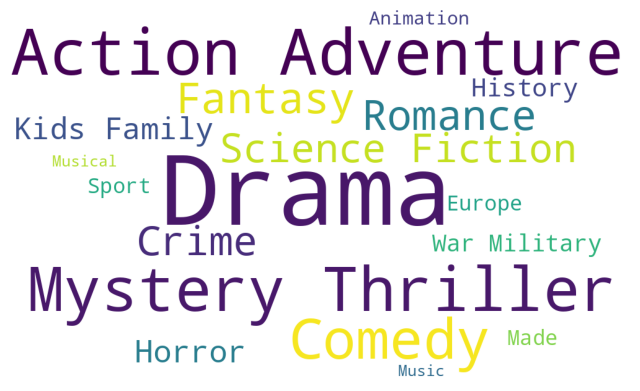

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

text = " ".join(df['Genres'])
wordcloud = WordCloud(width = 1000, height = 600, background_color = 'White').generate(text)

plt.figure(figsize = (8,5))
plt.imshow(wordcloud)

plt.axis('off')
plt.show()

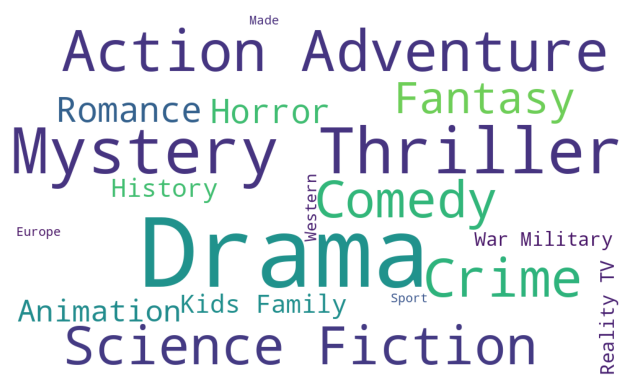

In [ ]:
# top Genres of Tv show
text = " ".join(df_Tv['Genres'])
wordcloud = WordCloud(width = 1000, height = 600, background_color = 'White').generate(text)

plt.figure(figsize = (8,5))
plt.imshow(wordcloud)

plt.axis('off')
plt.show()

## **Finding Predominant Streaming Service**

In [ ]:
# Write Your Code here
streaming_service_count = df.groupby('Streaming Service').size().reset_index(name = 'Count')
streaming_service_count_sorted = streaming_service_count.sort_values(by = 'Count', ascending = False)
streaming_service_count_sorted

,Streaming Service,Count
0,Amazon Prime Video,29
8,Netflix,18
2,Apple TV,17
4,Bookmyshow,11
10,Streaming Service Not Found,10
11,Zee5,5
9,Sony Liv,3
7,Lionsgate Play,2
1,Amazon Video,1
3,Apple TV Plus,1


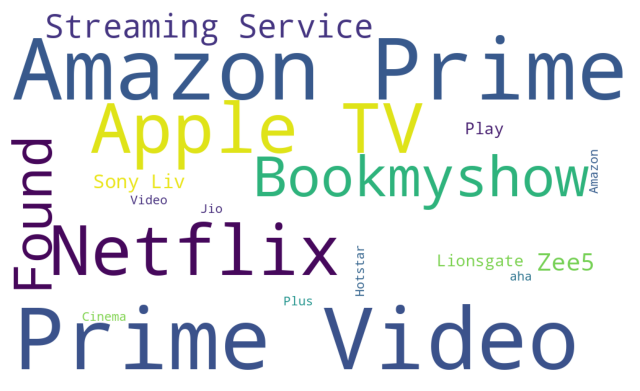

In [ ]:
#Let's Visvalize it using word cloud
text = " ".join(df['Streaming Service'])
wordcloud = WordCloud(width = 1000, height = 600, background_color = 'White').generate(text)
plt.figure(figsize = (8,5))
plt.imshow(wordcloud)

plt.axis('off')
plt.show()

## **Task 3 :- Data Export**

In [ ]:
#saving final dataframe as Final Data in csv format
df.to_csv("Original_DataFrame.csv", index = False)
print('Export Successfully')

Export Successfully


In [ ]:
#saving filter data as Filter Data in csv format
Filter_Movies.to_csv('Filter_All_Movies.csv', index = False)
print('Export Successfully')

Export Successfully


# **Dataset Drive Link (View Access with Anyone) -**

# ***Congratulations!!! You have completed your Assignment.***